In [153]:
%%time

import pandas as pd
import numpy as np

# Random seed for reproducibility
SEED = 123
# A file to save global variables
global_variables = pd.DataFrame({'SEED': [SEED]})
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

train_unprocessed = pd.read_csv('datasets/train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test_unprocessed = pd.read_csv('datasets/test.csv', index_col='ID_LAT_LON_YEAR_WEEK')

train_unprocessed.head()

CPU times: total: 609 ms
Wall time: 979 ms


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [154]:
train_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

## 00. Baseline

First, we'll make a baseline prediction, that all emissions are equal to the median emission of the training set. We'll calculate the Score of this prediction on the training set (for future cases, we'll calculate separately Train Score and Cross-validation Score).

Here is what we'll use to compare performances of our models:

Cross-val Score = (Average Cross-validation RMSE) + (1 Standard deviation of Cross-validation RMSE).

(we want to minimize this Score).

Score for this case will be just Train RMSE.

We'll save our intermediate results in DataFrame scores_df:

In [155]:
from sklearn.metrics import mean_squared_error

train_predictions_00 = pd.DataFrame([train_unprocessed['emission'].median()] * len(train_unprocessed), columns=['emission'])

scores_df = pd.DataFrame({'Comment': [], 'Train Score': [], 'Cross-val Score': [], 'Test RMSE': []})

score_00 = mean_squared_error(train_unprocessed['emission'], train_predictions_00['emission'], squared=False) - 0

scores_df.loc[0, 'Comment'] = 'Just median'
scores_df.loc[0, 'Train Score'] = score_00
scores_df.loc[0, 'Cross-val Score'] = np.nan
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,NaN


Now, we'll make a submission to Kaggle to see our Test RMSE. We won't use Test RMSE in making decisions, since we don't want to overfit to the visible testing data (unvisible part of the testing data will be used in calculating the final competition score) but we'll use Test RMSE to catch bugs in our Score calculations:

In [156]:
test_predictions_00 = pd.DataFrame([train_predictions_00['emission'].median()] * len(test_unprocessed), columns=['emission'])
submission_00 = pd.concat([pd.DataFrame(test_unprocessed.index, columns=['ID_LAT_LON_YEAR_WEEK']), test_predictions_00], axis=1)

submission_00.to_csv('submissions/submission_00.csv', index=False)

scores_df.loc[0, 'Test RMSE'] = 169.19374
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374


## Choosing number of cross-validation splits

We'll use LightGBM with n_estimators=10 as our first estimator. It is fast, efficient, doesn't require normalization and can handle missing values. Increasing n_estimators will improve performance, 

For calculating Score, I wrote get_score function, that is located in ['functions/get_score.py'](functions/get_score.py). This function takes a number of TimeSeriesSplit slits as one of its arguments. 

We want such number of splits that give us the best balance between bias and variance. For the sake of run time, the optimal number of splits calculation is done in a separate file: ['functions/n_splits.py'](functions/n_splits.py). We'll calculate scores among several different random states (all depend on the SEED, chosen at the beginning of this file).

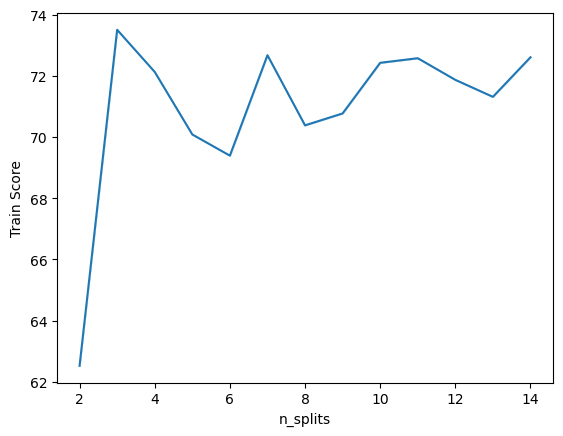

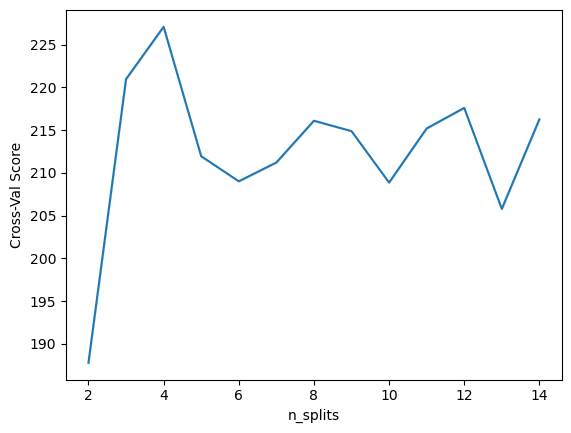

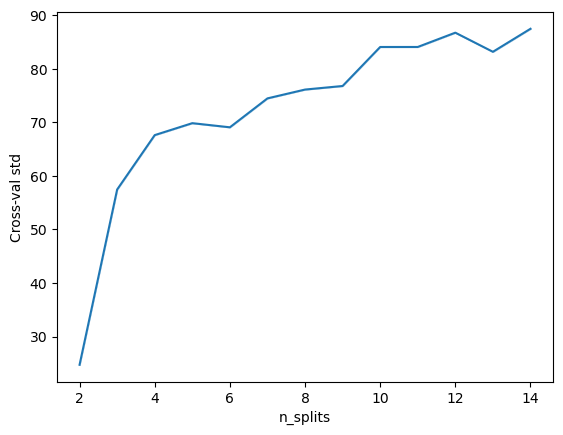

In [157]:
tradeoff = pd.read_csv('functions/tradeoff.csv', index_col=0)

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=tradeoff, x='n_splits', y='Train Score')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-Val Score')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-val std')
plt.show()


We'll use 4 splits, for a good balance between bias, variance and execution time:

In [158]:
N_SPLITS = 4
global_variables['N_SPLITS'] = N_SPLITS
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

## 01. LightGBM on unprocessed data

Let's find Scores and Test RMSE for this number of splits:

In [159]:
%%time

# UNCOMMENT TO INSTALL LightGBM
#!pip install lightgbm
import lightgbm as lgb

study_number = '01'

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1, n_estimators=10)

# Calculate scores
from functions.get_score import get_score

train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_unprocessed, test_unprocessed, model, scores_df,
                                                                  comment="LightGBM on unprocessed data")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 14.4 s
Wall time: 1.73 s


In [160]:
scores_df.loc[int(study_number), 'Test RMSE'] = 92.71815
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815


Good. Now we have a real baseline for comparing our models (based on the Cross-val Score).

## 02. Feature selection

However, time to train is still high on my laptop. Let's look at feature importances (according to our estimator) and select only the most important features:

In [161]:
%%time

study_number = '02'

## Train the model on the whole training set
model.fit(train_unprocessed.drop('emission', axis=1), train_unprocessed['emission'])

feature_importances = pd.Series(data=model.feature_importances_, index=train_unprocessed.drop('emission', axis=1).columns)

print('Sorted feature importances (first 10):')
feature_importances.sort_values(ascending=False).head(10)

Sorted feature importances (first 10):
CPU times: total: 2.31 s
Wall time: 360 ms


latitude                                  160
longitude                                 125
week_no                                    10
Cloud_solar_azimuth_angle                   1
UvAerosolIndex_solar_azimuth_angle          1
Formaldehyde_solar_azimuth_angle            1
Ozone_solar_azimuth_angle                   1
Cloud_surface_albedo                        1
UvAerosolIndex_absorbing_aerosol_index      0
UvAerosolIndex_sensor_altitude              0
dtype: int32

Now, let's select only features with non-zero feture importances and calculate the Score:

In [162]:
%%time

# Create copies of data
train = train_unprocessed.copy(deep=True)
test = test_unprocessed.copy(deep=True)

selected_columns = list(feature_importances.index[feature_importances > 0])
selected_columns

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]


#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="Only important features")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 3.67 s
Wall time: 388 ms


In [163]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN


As we can see, Cross-val score has even decreased a bit, and speed is higher now.

There are many ways to proceed. I will be storing the ideas I haven't tried yet in ['ideas.txt'](ideas.txt).

## 03. Location Mean Target Encoding

Note, latitude and longitude do not really make sence as numerical features. Instead, we shall create a categorical feature Location, which will be a combination of latitude and longitude:

In [164]:
study_number = '03'

feature_name = 'Location'

# Create a new feature
for data in [train, test]:
    data[feature_name] = data['latitude'].astype('string') + data['longitude'].astype('string')
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  string
dtypes: string(1)
memory usage: 3.2+ MB
None
count          79023
unique           497
top       -0.5129.29
freq             159
Name: Location, dtype: object
Unique Values and their count:
-0.5129.29      159
-0.72629.374    159
-0.54729.653    159
-0.56930.031    159
-0.59829.102    159
               ... 
-3.15330.347    159
-3.16128.839    159
-3.17429.926    159
-3.28729.713    159
-3.29930.301    159
Name: Location, Length: 497, dtype: Int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  string
dtypes: string(1)
memory usage: 380.5+ KB
None
count          24353
unique           497
top       -0.5129.29
freq              49
Name: Locatio

Alright, we have 497 unique locations. We need to express Location as a numerical feature (or features). We'll create a feature Location_enc, using Mean Target Encoding, so locations with similar mean emissions (in the training set) will have similar Location_enc values.


In [165]:
# !pip install feature_engine

from feature_engine.encoding import MeanEncoder

encoder = MeanEncoder()

train['Location'] = train['Location'].astype('category')
test['Location'] = test['Location'].astype('category')

train['Location_enc'] = encoder.fit_transform(train[['Location']], train['emission'])
test['Location_enc'] = encoder.transform(test[['Location']])

feature_name = 'Location_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
79023 non-null  float64
dtypes: float64(1)
memory usage: 3.2+ MB
None
count    79023.000000
mean        81.940552
std        137.220332
min          0.000000
25%         10.900797
50%         46.700873
75%        113.135679
max       2233.431628
Name: Location_enc, dtype: float64
Unique Values and their count:
0.000000      2385
4.272966       159
102.257323     159
305.690542     159
336.199968     159
              ... 
42.203393      159
113.681664     159
67.246964      159
86.925462      159
27.633301      159
Name: Location_enc, Length: 483, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
24353 non-null  float64
dtypes: float64(1)
memory usage: 380.5+

Now we have one feature for comparing locations. Let's remove longitude and latitude and add this feature instead:

In [166]:
%%time

selected_columns.remove('latitude')
selected_columns.remove('longitude')
selected_columns.append('Location_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="Location_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 3.34 s
Wall time: 350 ms


In [167]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.455999,143.732975,NaN


Good, that worked, our Cross-val Score has decreased.

## 04. Week count

Even though 'year' variable wasn't selected by our model, we may still benefit from the better sence of time. For this, we'lll introduce WeekCount, which will be 0 for the first week in our time series, 1 for the next, and so on:

In [168]:
study_number = '04'

feature_name = 'WeekCount'
for data in [train, test]:
    
    data[feature_name] = (data['year'] - 2019) * 53 + data['week_no']
    
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())

train.tail()

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
79023 non-null  int64
dtypes: int64(1)
memory usage: 3.2+ MB
None
count    79023.000000
mean        79.000000
std         45.898729
min          0.000000
25%         39.000000
50%         79.000000
75%        119.000000
max        158.000000
Name: WeekCount, dtype: float64
Unique Values and their count:
0      497
109    497
102    497
103    497
104    497
      ... 
54     497
55     497
56     497
57     497
158    497
Name: WeekCount, Length: 159, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
24353 non-null  int64
dtypes: int64(1)
memory usage: 380.5+ KB
None
count    24353.000000
mean       183.000000
std         14.142426
min        159.000000
25%        171.0000

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location,Location_enc,WeekCount
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171,-3.29930.301,27.633301,154
ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497,-3.29930.301,27.633301,155
ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205,-3.29930.301,27.633301,156
ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792,-3.29930.301,27.633301,157
ID_-3.299_30.301_2021_52,-3.299,30.301,2021,52,-0.000091,0.871951,-0.000079,0.000000,76.825638,8.273742,...,19.464032,0.226276,-12.808528,47.923441,-136.299984,30.246387,27.239302,-3.29930.301,27.633301,158


Great. Now, let's test:

In [169]:
%%time

selected_columns.append('WeekCount')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]


#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="+ WeekCount")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 3.52 s
Wall time: 352 ms


In [170]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.455999,143.732975,NaN
4,+ WeekCount,55.262555,143.765802,NaN


Since Cross-val Score increased, we won't use this feature:

In [171]:
selected_columns.remove('WeekCount')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

## 05. Week of the year Mean Target Encoding

What if we do encoding on the 'week_no' feature? Potentially, it may catch some weekly common sesoanalities, if they exist.

In [172]:
study_number = '05'

from feature_engine.encoding import MeanEncoder

encoder = MeanEncoder()

train['week_no_category'] = train['week_no'].astype('category')
test['week_no_category'] = test['week_no'].astype('category')

train['week_no_enc'] = encoder.fit_transform(train[['week_no_category']], train['emission'])
test['week_no_enc'] = encoder.transform(test[['week_no_category']])

feature_name = 'week_no_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: week_no_enc
Non-Null Count  Dtype  
--------------  -----  
79023 non-null  float64
dtypes: float64(1)
memory usage: 3.2+ MB
None
count    79023.000000
mean        81.940552
std         11.358675
min         69.059198
25%         73.495496
50%         80.408753
75%         83.911750
max        115.211546
Name: week_no_enc, dtype: float64
Unique Values and their count:
72.088003     1491
73.000880     1491
72.415652     1491
70.403987     1491
75.116136     1491
75.136291     1491
74.912248     1491
75.988168     1491
79.200567     1491
79.366690     1491
79.985492     1491
80.843326     1491
86.388165     1491
103.587349    1491
106.899378    1491
110.402315    1491
115.211546    1491
81.144497     1491
81.831373     1491
82.322285     1491
83.484188     1491
81.286079     1491
80.913570     1491
81.764307     1491
76.659700     1491
72.845497     1491
73.344191  

Let's test:

In [173]:
%%time

selected_columns.append('week_no_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="3 + week_no_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 3.45 s
Wall time: 410 ms


In [174]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.455999,143.732975,NaN
4,+ WeekCount,55.262555,143.765802,NaN
5,3 + week_no_enc,54.355940,143.466844,NaN


That worked.

## 06. Locaton AND Week of the year Mean Target Encoding

What if we combine Location and week_no in one categorical feature and try Mean Target Encoding?

In [175]:
study_number = '06'

train['Location+week_no'] = (train['Location'].astype('str') + train['week_no'].astype('str')).astype('category')
test['Location+week_no'] = (test['Location'].astype('str') + test['week_no'].astype('str')).astype('category')

train['Location+week_no_enc'] = encoder.fit_transform(train[['Location+week_no']], train['emission'])
test['Location+week_no_enc'] = encoder.transform(test[['Location+week_no']])

feature_name = 'Location+week_no'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location+week_no
Non-Null Count  Dtype   
--------------  -----   
79023 non-null  category
dtypes: category(1)
memory usage: 4.0+ MB
None
count           79023
unique          26341
top       -0.5129.290
freq                3
Name: Location+week_no, dtype: object
Unique Values and their count:
-0.5129.290       3
-2.26930.23121    3
-2.26930.23130    3
-2.26930.2313     3
-2.26930.23129    3
                 ..
-1.4930.5139      3
-1.4930.5138      3
-1.4930.5137      3
-1.4930.5136      3
-3.29930.3019     3
Name: Location+week_no, Length: 26341, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location+week_no
Non-Null Count  Dtype   
--------------  -----   
24353 non-null  category
dtypes: category(1)
memory usage: 944.1+ KB
None
count           24353
unique          24353

In [176]:
%%time

selected_columns.append('Location+week_no_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="+ Location+week_no_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 3.75 s
Wall time: 426 ms


In [177]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.455999,143.732975,NaN
4,+ WeekCount,55.262555,143.765802,NaN
5,3 + week_no_enc,54.355940,143.466844,NaN
6,+ Location+week_no_enc,52.717994,140.844908,NaN


That worked as well.

## 07. Most important features revisited

We introduced several new features. Let's re-estimate what features are most important for calculating emission:

In [178]:
%%time

study_number = '07'

all_features = list(train_unprocessed.drop('emission', axis=1).columns)
all_features.append('Location_enc')
all_features.append('week_no_enc')
all_features.append('Location+week_no_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]


## Train the model 
model.fit(train_selected.drop('emission', axis=1), train_unprocessed['emission'])

feature_importances = pd.Series(data=model.feature_importances_, index=train_selected.drop('emission', axis=1).columns)

print('Sorted feature importances (first 10):')
feature_importances.sort_values(ascending=False).head(10)

Sorted feature importances (first 10):
CPU times: total: 391 ms
Wall time: 80.4 ms


Location+week_no_enc                  215
week_no                                30
week_no_enc                            19
Cloud_surface_albedo                   17
Location_enc                           10
UvAerosolIndex_solar_azimuth_angle      5
Formaldehyde_solar_azimuth_angle        4
Ozone_solar_azimuth_angle               0
Cloud_solar_azimuth_angle               0
dtype: int32

In [179]:
%%time

selected_columns = list(feature_importances.index[feature_importances > 0])
print('Selected columns:')
print(selected_columns)

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]


#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="Only important features revisited")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

Selected columns:
['week_no', 'Formaldehyde_solar_azimuth_angle', 'UvAerosolIndex_solar_azimuth_angle', 'Cloud_surface_albedo', 'Location_enc', 'week_no_enc', 'Location+week_no_enc']
CPU times: total: 3.7 s
Wall time: 348 ms


In [180]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.455999,143.732975,NaN
4,+ WeekCount,55.262555,143.765802,NaN
5,3 + week_no_enc,54.355940,143.466844,NaN
6,+ Location+week_no_enc,52.717994,140.844908,NaN
7,Only important features revisited,52.722061,140.836780,NaN


## 08. Filling NaNs for 7 most important features

Let's use KNNImputer to input missing values for 7 most important features:

In [181]:
%%time

study_number = '08'

from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(weights='distance')
# fit on the dataset and transform the datasets
Xtrans = imputer.fit_transform(train_selected.drop('emission', axis=1))
#Xtrans = imputer.transform(train_selected.drop('emission', axis=1))
train_selected_filled = pd.DataFrame(Xtrans, index=train_selected.index)
train_selected_filled = pd.concat([train_selected_filled, train_selected['emission']], axis=1)
train_selected_filled.columns = train_selected.columns
Xtrans = imputer.transform(test_selected)
test_selected_filled = pd.DataFrame(Xtrans, index=test_selected.index, columns=test_selected.columns)


CPU times: total: 55 s
Wall time: 41.3 s


In [182]:
train_selected_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   week_no                             79023 non-null  float64
 1   Formaldehyde_solar_azimuth_angle    79023 non-null  float64
 2   UvAerosolIndex_solar_azimuth_angle  79023 non-null  float64
 3   Cloud_surface_albedo                79023 non-null  float64
 4   Location_enc                        79023 non-null  float64
 5   week_no_enc                         79023 non-null  float64
 6   Location+week_no_enc                79023 non-null  float64
 7   emission                            79023 non-null  float64
dtypes: float64(8)
memory usage: 7.4+ MB


In [183]:
#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected_filled, test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="+ Filled")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

In [184]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.455999,143.732975,NaN
4,+ WeekCount,55.262555,143.765802,NaN
5,3 + week_no_enc,54.355940,143.466844,NaN
6,+ Location+week_no_enc,52.717994,140.844908,NaN
7,Only important features revisited,52.722061,140.836780,NaN
8,+ Filled,52.722614,140.937285,NaN


This filling works worse than NaNs.

## 09. Filling NaNs based on 3 features

Now we'll use 3 most important features in calculating distances. They contain information about location and week of the year.

In [185]:
%%time

study_number = '09'

selected_columns_1 = list(feature_importances.sort_values(ascending=False).index[:3])
features_train = train[selected_columns_1]
features_test =  test[selected_columns_1]

# For each column with missing values
for column in list(train_selected.columns[train_selected.isna().any()]):
    
    # Create a DataFrame of a feature with missing values and 5 most important features
    df_to_fill_train = pd.concat([train[column], features_train], axis=1)
    df_to_fill_test = pd.concat([test[column], features_test], axis=1)
                                  
    # fit on the dataset
    imputer.fit(df_to_fill_train)
    # transform the datasets
    Xtrans = imputer.transform(df_to_fill_train)
    train_selected_filled[column] = Xtrans[:, 0]
    Xtrans = imputer.transform(df_to_fill_test)
    test_selected_filled[column] = Xtrans[:, 0]



CPU times: total: 1min 4s
Wall time: 41.4 s


In [186]:
train_selected_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   week_no                             79023 non-null  float64
 1   Formaldehyde_solar_azimuth_angle    79023 non-null  float64
 2   UvAerosolIndex_solar_azimuth_angle  79023 non-null  float64
 3   Cloud_surface_albedo                79023 non-null  float64
 4   Location_enc                        79023 non-null  float64
 5   week_no_enc                         79023 non-null  float64
 6   Location+week_no_enc                79023 non-null  float64
 7   emission                            79023 non-null  float64
dtypes: float64(8)
memory usage: 7.4+ MB


In [187]:
#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected_filled, test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="7 + Filled based on 3")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

In [188]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.455999,143.732975,NaN
4,+ WeekCount,55.262555,143.765802,NaN
5,3 + week_no_enc,54.355940,143.466844,NaN
6,+ Location+week_no_enc,52.717994,140.844908,NaN
7,Only important features revisited,52.722061,140.836780,NaN
8,+ Filled,52.722614,140.937285,NaN
9,7 + Filled based on 3,52.743065,140.904253,NaN


## 10. Filling NaNs based on Location

Let's try to fill NaNs with medians for their location:

In [189]:
%%time

study_number = '10'

for location in train['Location']:
    # For each column with missing values
    for column in list(train_selected.columns[train_selected.isna().any()]):
        #Calculate median
        median = train_selected.loc[train['Location'] == location, column].median()
        
        # Fill NaNs
        train_selected_filled.loc[(train['Location'] == location) & 
                                  train_selected[column].isna(), column] = median
        test_selected_filled.loc[(test['Location'] == location) & 
                                  test_selected[column].isna(), column] = median

KeyboardInterrupt: 

In [190]:
print(train_selected_filled.info())
print(test_selected_filled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   week_no                             79023 non-null  float64
 1   Formaldehyde_solar_azimuth_angle    78546 non-null  float64
 2   UvAerosolIndex_solar_azimuth_angle  78546 non-null  float64
 3   Cloud_surface_albedo                78546 non-null  float64
 4   Location_enc                        79023 non-null  float64
 5   week_no_enc                         79023 non-null  float64
 6   Location+week_no_enc                79023 non-null  float64
 7   emission                            79023 non-null  float64
dtypes: float64(8)
memory usage: 7.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 7 columns):
 #   Column   

Some values are still missing, since there were no data for this location. We'll fill them with overall medians:

In [191]:
%%time

# For each column with missing values
for column in list(train_selected_filled.columns[train_selected.isna().any()]):
    #Calculate median
    median = train_selected_filled[column].median()

    # Fill NaNs
    train_selected_filled.loc[train_selected_filled[column].isna(), column] = median
    test_selected_filled.loc[test_selected_filled[column].isna(), column] = median

CPU times: total: 0 ns
Wall time: 7.42 ms


In [192]:
print(train_selected_filled.info())
print(test_selected_filled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   week_no                             79023 non-null  float64
 1   Formaldehyde_solar_azimuth_angle    79023 non-null  float64
 2   UvAerosolIndex_solar_azimuth_angle  79023 non-null  float64
 3   Cloud_surface_albedo                79023 non-null  float64
 4   Location_enc                        79023 non-null  float64
 5   week_no_enc                         79023 non-null  float64
 6   Location+week_no_enc                79023 non-null  float64
 7   emission                            79023 non-null  float64
dtypes: float64(8)
memory usage: 7.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 7 columns):
 #   Column   

In [193]:
#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected_filled, test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="7 + Filled based on Location")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

In [194]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.455999,143.732975,NaN
4,+ WeekCount,55.262555,143.765802,NaN
5,3 + week_no_enc,54.355940,143.466844,NaN
6,+ Location+week_no_enc,52.717994,140.844908,NaN
7,Only important features revisited,52.722061,140.836780,NaN
8,+ Filled,52.722614,140.937285,NaN
9,7 + Filled based on 3,52.743065,140.904253,NaN


We see a small improvement, so we'll use this strategy to fill all missing values. This will be computantionally expensive, but we'll change the notebook soon afterwards to ['CO2 Emissions 2.ipynb'](CO2 Emissions 2.ipynb).

In [145]:
%%time

for location in train['Location']:
    # For each column with missing values
    for column in list(train.columns[train.isna().any()]):
        #Calculate median
        median = train.loc[train['Location'] == location, column].median()
        
        # Fill NaNs
        train.loc[(train['Location'] == location) & 
                                  (train[column].isna()), column] = median
        test.loc[(test['Location'] == location) & 
                                  test[column].isna(), column] = median

CPU times: total: 2h 10min 37s
Wall time: 2h 17min 11s


In [146]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 82 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   latitude                                                  79023 non-null  float64 
 1   longitude                                                 79023 non-null  float64 
 2   year                                                      79023 non-null  int64   
 3   week_no                                                   79023 non-null  int64   
 4   SulphurDioxide_SO2_column_number_density                  78546 non-null  float64 
 5   SulphurDioxide_SO2_column_number_density_amf              78546 non-null  float64 
 6   SulphurDioxide_SO2_slant_column_number_density            78546 non-null  float64 
 7   SulphurDioxide_cloud_fraction                            

In [149]:
%%time

# For each column with missing values
for column in list(train.columns[train.isna().any()]):
    #Calculate median
    median = train[column].median()

    # Fill NaNs
    train.loc[train[column].isna(), column] = median
    test.loc[test[column].isna(), column] = median

CPU times: total: 93.8 ms
Wall time: 110 ms


In [150]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 82 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   latitude                                                  79023 non-null  float64 
 1   longitude                                                 79023 non-null  float64 
 2   year                                                      79023 non-null  int64   
 3   week_no                                                   79023 non-null  int64   
 4   SulphurDioxide_SO2_column_number_density                  79023 non-null  float64 
 5   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  float64 
 6   SulphurDioxide_SO2_slant_column_number_density            79023 non-null  float64 
 7   SulphurDioxide_cloud_fraction                            

In [152]:
train.to_csv('new_datasets/train_from_part_1.csv')
test.to_csv('new_datasets/test_from_part_1.csv')